Most Common Keywords in Reviews:
[('ratednot', 1897), ('goodvery', 678), ('goodgoodvery', 50), ('goodexcellentvery', 43), ('ratedvery', 38), ('goodgoodgoodvery', 17), ('ratedpoorvery', 16), ('goodexcellentexcellentvery', 13), ('goodexcellentgoodvery', 13), ('ratedaverageaveragenot', 11)]

Average Review Length: 7.020730813527379


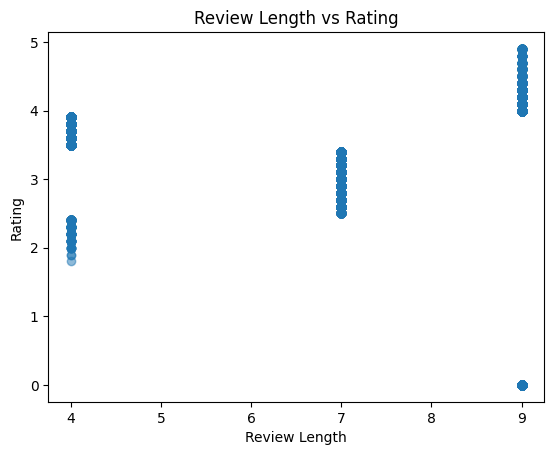


Restaurant with Maximum Votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Restaurant with Minimum Votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object

Correlation between Votes and Rating: 0.31369058419541146


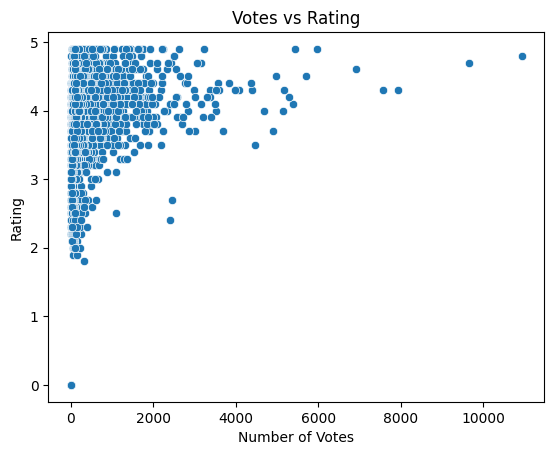

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

restaurant_df=pd.read_csv('Dataset.csv')

def refined_data(sentence):
    sentence=sentence.lower()
    sentence=re.sub(r'\d+','',sentence)
    sentence=re.sub(r'[^\w\s]','',sentence)
    return sentence

restaurant_df['Cleaned Reviews']=restaurant_df['Rating text'].apply(refined_data)

def common_keyword(reviews,n=10):
    words=''.join(reviews).split()
    common_words=Counter(words).most_common(n)
    return common_words

common_keywords=common_keyword(restaurant_df['Cleaned Reviews'],n=10)
print("Most Common Keywords in Reviews:")
print(common_keywords)

restaurant_df['Review Length'] = restaurant_df['Cleaned Reviews'].apply(len)

average_review_length = restaurant_df['Review Length'].mean()
print("\nAverage Review Length:", average_review_length)


restaurant_df['Rating'] = restaurant_df['Aggregate rating']

plt.scatter(restaurant_df['Review Length'], restaurant_df['Rating'], alpha=0.5)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

max_votes = restaurant_df.loc[restaurant_df['Votes'].idxmax()]
min_votes = restaurant_df.loc[restaurant_df['Votes'].idxmin()]

print("\nRestaurant with Maximum Votes:")
print(max_votes[['Restaurant Name', 'Votes']])
print("\nRestaurant with Minimum Votes:")
print(min_votes[['Restaurant Name', 'Votes']])


votes_rating = restaurant_df['Votes'].corr(restaurant_df['Aggregate rating'])
print("\nCorrelation between Votes and Rating:", votes_rating)


sns.scatterplot(x=restaurant_df['Votes'], y=restaurant_df['Aggregate rating'])
plt.title('Votes vs Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()
